# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, April 19, 2017

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## 1. Data

In [15]:
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

In [16]:
tfidf_vectorizer = TfidfVectorizer(min_df=30)
X = tfidf_vectorizer.fit_transform(newsgroups_train.data)
y = newsgroups_train.target

## 2. PCA - Principal Components Analysis

In [17]:
pca = PCA(n_components=2)

In [18]:
X_reduced = pca.fit_transform(X.toarray())

In [19]:
print ('Original Shape: ', X.shape)
print ('Reduced Shape: ', X_reduced.shape)

('Original Shape: ', (2369, 1771))
('Reduced Shape: ', (2369, 2))


## 3. Visualizing the reduced data points

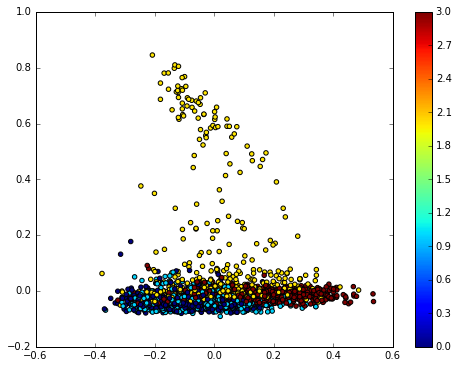

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y)
plt.colorbar()

## 4. Analysis

In [20]:
print ('Ratio of variance explained: ', pca.explained_variance_ratio_)

('Ratio of variance explained: ', array([ 0.03080441,  0.01712901]))


In [21]:
principal_components = pca.components_

In [24]:
# What will be the shape of principal_components?

#principal_components.shape

In [25]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])
insens_idx = np.argsort(principal_components[0])

print ('Top 10 most activated words (loadings)')
for jj in insens_idx[-10:]:
    print '{} ({:0.6f})'.format(invocab[jj], principal_components[0,jj])
    
    
print ('\n Top 10 least activated words (loadings)')
for jj in insens_idx[:10]:
    print '{} ({:0.6f})'.format(invocab[jj], principal_components[0,jj])

Top 10 most activated words (loadings)
not (0.121831)
we (0.130983)
in (0.140311)
god (0.149258)
is (0.185458)
and (0.188487)
to (0.233587)
that (0.235554)
of (0.272942)
the (0.487690)

 Top 10 least activated words (loadings)
edu (-0.092635)
com (-0.083223)
nntp (-0.074870)
host (-0.073417)
posting (-0.071231)
organization (-0.052843)
lines (-0.051670)
subject (-0.048754)
mac (-0.048691)
thanks (-0.048238)


In [26]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])
insens_idx = np.argsort(principal_components[1])

print ('Top 10 most activated words (loadings)')
for jj in insens_idx[-10:]:
    print '{} ({:0.6f})'.format(invocab[jj], principal_components[1,jj])
    
    
print ('\n Top 10 least activated words (loadings)')
for jj in insens_idx[:10]:
    print '{} ({:0.6f})'.format(invocab[jj], principal_components[1,jj])

Top 10 most activated words (loadings)
chastity (0.131446)
n3jxp (0.131446)
shameful (0.131702)
dsl (0.131702)
cadre (0.131702)
cs (0.225376)
gordon (0.376228)
banks (0.382740)
geb (0.384500)
pitt (0.416698)

 Top 10 least activated words (loadings)
the (-0.046122)
bike (-0.045915)
on (-0.043569)
mac (-0.043080)
for (-0.039867)
ca (-0.039520)
my (-0.038442)
apple (-0.036363)
nntp (-0.033882)
posting (-0.033820)
